<a href="https://colab.research.google.com/github/bcury/Python-Projects/blob/main/Simula%C3%A7%C3%A3o_MonteCarlo_previs%C3%B5es_Pre%C3%A7osdeA%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

In [3]:
base = pd.read_csv('/content/acoes.csv')

In [4]:
base.shape

(1446, 7)

In [5]:
base.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,11.8462,0.232812,35.732101,47.259998
1,2015-01-05,14.85,15.00,11.9269,0.237187,34.634201,46.320000
2,2015-01-06,15.21,14.80,11.7500,0.234062,32.468300,46.580002
3,2015-01-07,14.55,14.67,11.6154,0.241875,32.238701,48.150002
4,2015-01-08,14.27,14.15,11.8115,0.240000,32.987301,48.509998


In [6]:
figura = px.line(title = 'Historico dos stickers')
for i in base.columns[1:]:
  figura.add_scatter( x = base['Date'], y = base[i], name= i)
figura.show()

In [7]:
base = pd.DataFrame(base['BOVA'])
base

,BOVA
0,47.259998
1,46.320000
2,46.580002
3,48.150002
4,48.509998
...,...
1441,95.800003
1442,92.430000
1443,92.910004
1444,90.660004


In [8]:
base_normalizada = base.copy()
for i in base:
  base_normalizada[i] = base[i] / base[i][0]

base_normalizada

,BOVA
0,1.000000
1,0.980110
2,0.985612
3,1.018832
4,1.026449
...,...
1441,2.027084
1442,1.955777
1443,1.965933
1444,1.918324


In [9]:
base_taxa_retorno = np.log(1 + base_normalizada.pct_change())
base_taxa_retorno

,BOVA
0,NaN
1,-0.020090
2,0.005597
3,0.033150
4,0.007449
...,...
1441,-0.010074
1442,-0.035811
1443,0.005180
1444,-0.024515


In [10]:
base_taxa_retorno.fillna(0, inplace=True)
base_taxa_retorno.head()

,BOVA
0,0.000000
1,-0.020090
2,0.005597
3,0.033150
4,0.007449


- calculo do drift

In [12]:
media = base_taxa_retorno.mean()
media

BOVA    0.000464
dtype: float64

In [13]:
variancia = base_taxa_retorno.var()
variancia

BOVA    0.000304
dtype: float64

In [14]:
drift = media - (0.5 * variancia)
drift

BOVA    0.000312
dtype: float64

- calculos dos retornos diarios

In [15]:
dias_frente = 50 #quantos dias a frente vamos fazer as previsoes

In [17]:
simulações = 10 #em geral podemos ter mais

In [18]:
desvio_padrao = base_taxa_retorno.std()
desvio_padrao

BOVA    0.017426
dtype: float64

In [19]:
z = stats.norm.ppf(np.random.rand(dias_frente, simulações))

In [20]:
z.shape

(50, 10)

In [21]:
z

array([[-4.64951719e-01, -6.13377227e-01, -1.73069048e+00,
         4.62901227e-01,  1.25377147e+00, -7.46813000e-01,
        -1.79515217e+00, -3.57653406e-01,  5.57547873e-01,
        -7.49391387e-01],
       [-1.78354328e+00,  3.54286514e-01, -1.20086031e-01,
         1.26086194e-01,  1.95706964e-01,  1.23299836e+00,
         1.47982537e+00, -1.10432061e+00, -1.64896214e+00,
        -1.06312502e+00],
       [-3.26157007e-02,  1.03988938e-01, -2.50997756e+00,
        -1.60370893e+00, -3.32199994e-01, -2.24903811e-01,
         1.14308461e+00,  2.25995041e-02, -1.82730577e-01,
         3.31336628e-01],
       [ 5.26693434e-01, -7.83248600e-03, -8.92790808e-02,
        -1.32934790e+00,  9.06482196e-01, -1.06966994e+00,
         3.63093005e-01,  3.17719520e+00,  9.30677292e-01,
         8.15341980e-01],
       [-1.30594374e-01, -1.08930451e+00, -1.47378339e-01,
        -1.38404684e+00,  9.74754957e-03, -7.98233762e-01,
        -4.45934759e-01, -3.39524219e-01,  1.40042024e-01,
         1.

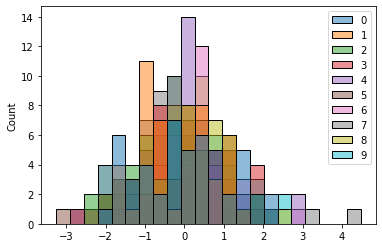

In [22]:
sns.histplot(z);

In [25]:
retornos_diarios = np.exp(drift.values +  desvio_padrao.values * z)

In [26]:
retornos_diarios.shape

(50, 10)

In [27]:
retornos_diarios

array([[0.99223999, 0.98967694, 0.97059416, 1.00841356, 1.02240732,
        0.98737838, 0.9695045 , 0.99409698, 1.01007811, 0.98733402],
       [0.96970065, 1.00650674, 0.99822089, 1.00251222, 1.00372921,
        1.02203728, 1.02644271, 0.98124625, 0.97197745, 0.98195091],
       [0.99974359, 1.00212627, 0.95750282, 0.97274423, 0.99453801,
        0.99639927, 1.02043718, 1.00070598, 0.99713179, 1.00610429],
       [1.00953517, 1.00017544, 0.99875692, 0.97740603, 1.01623858,
        0.98183893, 1.00666121, 1.05725643, 1.01666714, 1.01462588],
       [0.99803812, 0.98150305, 0.99774626, 0.97647484, 1.00048189,
        0.98649404, 0.99256886, 0.99441109, 1.00275606, 1.03200754],
       [1.04226351, 1.00055063, 0.98595227, 0.98671753, 1.04076467,
        1.01712577, 1.00117416, 0.9628274 , 1.01576607, 0.9814284 ],
       [1.0280646 , 0.97480834, 0.98615809, 0.99647567, 1.02616533,
        1.02891826, 0.98794645, 1.03948774, 1.00571508, 0.99413425],
       [0.99875805, 1.01644041, 0.9935276

- previsoes de preços futuros

In [28]:
previsoes = np.zeros_like(retornos_diarios)

In [29]:
previsoes.shape

(50, 10)

In [30]:
previsoes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [31]:
previsoes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
 base.iloc[-1] #ultimo

BOVA    92.410004
Name: 1445, dtype: float64

In [39]:
previsoes[0] = base.iloc[-1]
previsoes

array([[92.41000366, 92.41000366, 92.41000366, 92.41000366, 92.41000366,
        92.41000366, 92.41000366, 92.41000366, 92.41000366, 92.41000366],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [41]:
for dia in range(1, dias_frente):
  #print(dia)
  previsoes[dia] = previsoes[dia -1] * retornos_diarios[dia]

In [42]:
previsoes.shape

(50, 10)

In [43]:
previsoes

array([[ 92.41000366,  92.41000366,  92.41000366,  92.41000366,
         92.41000366,  92.41000366,  92.41000366,  92.41000366,
         92.41000366,  92.41000366],
       [ 89.61004017,  93.01129127,  92.24559643,  92.64215817,
         92.75462003,  94.44646907,  94.8535746 ,  90.67696993,
         89.82043958,  90.74208746],
       [ 89.58706307,  93.20905801,  88.32541876,  90.11712475,
         92.24799536,  94.10639256,  96.79211453,  90.74098575,
         89.56281614,  91.29600384],
       [ 90.44129112,  93.22541054,  88.2156232 ,  88.08102137,
         93.74597194,  92.3973195 ,  97.43686697,  95.93649057,
         91.05557202,  92.63128782],
       [ 90.26385607,  91.50102468,  88.01680817,  86.00890093,
         93.79114693,  91.14940454,  96.7128002 ,  95.40030976,
         91.30652625,  95.59618719],
       [ 94.07872304,  91.55140757,  86.78037215,  84.86649055,
         97.61451227,  92.71040795,  96.8263566 ,  91.85403207,
         92.74607094,  93.82081291],
       [ 9

- gráficos das previsoes

In [45]:
len(previsoes)

50

In [49]:
previsoes.T #matriz transposta

array([[ 92.41000366,  89.61004017,  89.58706307,  90.44129112,
         90.26385607,  94.07872304,  96.71900474,  96.59888506,
         97.10306149,  94.94424446,  93.43740284,  94.06157897,
         93.91150524,  96.6046011 ,  97.75104309,  99.64080435,
        102.59635884, 100.74938765, 102.6112647 , 103.56079752,
        100.52764595,  99.11656724,  96.40997156,  95.79840436,
         99.141933  ,  96.25406352,  96.85759623,  98.50755487,
         98.04802833, 102.00005718, 102.00176515, 103.19453773,
        103.77185148, 103.50090553, 101.56527574, 101.96152708,
         98.92788033,  96.45061034,  97.74034444,  97.12151183,
         99.83868443,  98.66402644,  95.70005906,  92.67463777,
         95.26520982,  95.70814962,  97.09970087,  99.55417472,
         98.91716953,  96.54287458],
       [ 92.41000366,  93.01129127,  93.20905801,  93.22541054,
         91.50102468,  91.55140757,  89.24507592,  90.71230188,
         89.15366897,  90.91844645,  91.36605167,  90.57881674,
   

In [51]:
previsoes.T.shape # no grafico abaixo teremos que usar a transposta pq se nao vai simular 50 vezes

(10, 50)

In [52]:
figura = px.line(title='Previsões dos preços das ações - Simulações de Monte Carlo')
for i in range(len(previsoes.T)):
  figura.add_scatter( y = previsoes.T[i], name= i)
figura.show()

